### Representando novas curvas

Vou fazer a simulação com as curvas

- Linear
- Cicloide 
- Circular
- Parábola

/tmp/ipykernel_15516/1740242978.py:26: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * g *(b- y_x)) / np.sqrt(1 + dy_x**2)


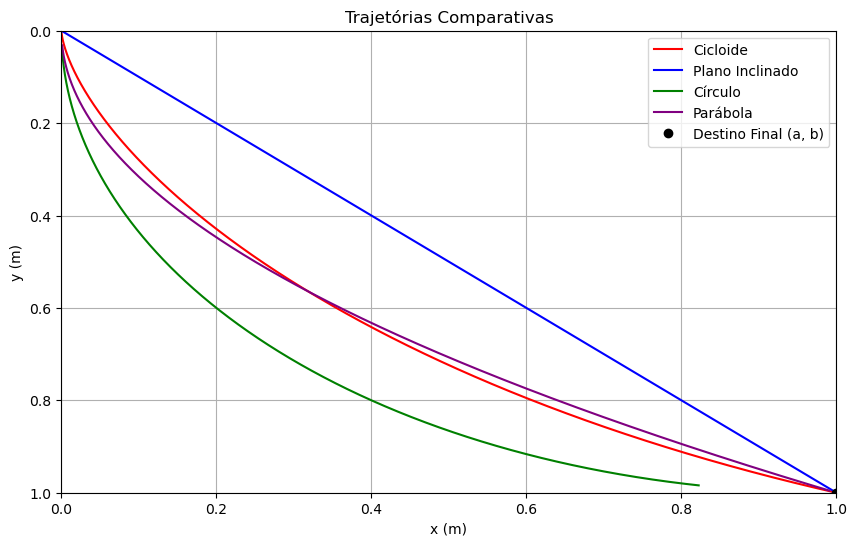

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton

# Definindo constantes físicas
m, g = 1, 9.81
a, b = 1, 1

# Função para encontrar theta2 usando o método de Newton
def f(theta):
    return b / a - (1 - np.cos(theta)) / (theta - np.sin(theta))

# Calcular theta2 e o raio R correspondente
theta2 = newton(f, np.pi / 2)
R = b / (1 - np.cos(theta2))

# Função que representa a EDO para a cicloide
def derivada_cycloid(t, x):
    return np.sqrt(g*m / R)

# Função que representa a EDO para o plano inclinado linear
def derivada_linear(t, x):
    y_x = x * b / a
    dy_x = b / a
    return np.sqrt(2 * g *(b- y_x)) / np.sqrt(1 + dy_x**2)

# Função que representa a EDO para o círculo
def derivada_circle(t, x):
    r = (b**2 + a**2) / (2 * a)
    y_x = np.sqrt(2 * r * x - x**2)
    dy_x = (r - x) / np.sqrt(2 * r * x - x**2)
    return np.sqrt(2 * g * (b- y_x)) / np.sqrt(1 + dy_x**2)

# Função que representa a EDO para a parábola
def derivada_parabola(t, x):
    c = (b/np.sqrt(a))
    y_x = c*np.sqrt(x)
    dy_x = c/(2* np.sqrt(x))
    return np.sqrt(2 * g * (b -  y_x)) / np.sqrt(1 + dy_x**2)

# Funções para calcular as coordenadas x e y da cicloide
def x_cycloide(theta):
    return R * (theta - np.sin(theta))

def y_cycloide(theta):
    return R * (1 - np.cos(theta))

# Condição inicial para a solução da EDO
x0 = 0.001  # x(0) = 0.1 para evitar divisão por zero

# Intervalo de tempo para a solução e pontos de avaliação
t_span = (0, 0.7)  # Intervalo de tempo de 0 a 10 segundos
t_eval = np.linspace(*t_span, num=10000)  # 10000 pontos no intervalo

# Resolver a EDO para a cicloide usando o método 'BDF'
solucao_cycloid = solve_ivp(derivada_cycloid, t_span, [0.01], t_eval=t_eval)
theta = solucao_cycloid.y[0]
# Calcular as coordenadas da cicloide usando os valores de theta
x_cycloid = x_cycloide(theta)
y_cycloid = y_cycloide(theta)


# Resolver a EDO para o plano inclinado linear usando o método 'BDF'
solucao_linear = solve_ivp(derivada_linear, t_span, [x0], t_eval=t_eval)
x_linear = solucao_linear.y[0]
y_linear = b / a * x_linear  # Calcular as coordenadas do plano inclinado linear


# Resolver a EDO para o círculo usando o método 'BDF'
solucao_circle = solve_ivp(derivada_circle, t_span, [x0], t_eval=t_eval, method='BDF')
x_circle = solucao_circle.y[0]
r = (b**2 + a**2) / (2 * a)
y_circle = np.sqrt(2 * r * x_circle - x_circle**2)  # Calcular as coordenadas para a trajetória circular'''

# Resolver a EDO para a parábola usando o método 'BDF'
solucao_parabola = solve_ivp(derivada_parabola, t_span, [x0], t_eval=t_eval, method='BDF')
x_parabola = solucao_parabola.y[0]
y_parabola = (b/np.sqrt(a)) * np.sqrt(x_parabola)  # Calcular as coordenadas para a trajetória parabólica

# Gráfico das soluções
plt.figure(figsize=(10, 6))
plt.plot(x_cycloid, y_cycloid, label='Cicloide', color='r')
plt.plot(x_linear, y_linear, label='Plano Inclinado', color='b')
plt.plot(x_circle, y_circle, label='Círculo', color='g')
plt.plot(x_parabola, y_parabola, label='Parábola', color='purple')

# Adiciona o ponto final com as coordenadas (a, b)
plt.plot(a, b, 'ko', label='Destino Final (a, b)')
#plt.text(a, b, f'({a}, {b})', fontsize=9, verticalalignment='bottom', horizontalalignment='right')
# Configurações adicionais do gráfico
plt.xlim(0, a)
plt.ylim(0,b)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajetórias Comparativas')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # Inverte o eixo y para coordenadas físicas
plt.show()






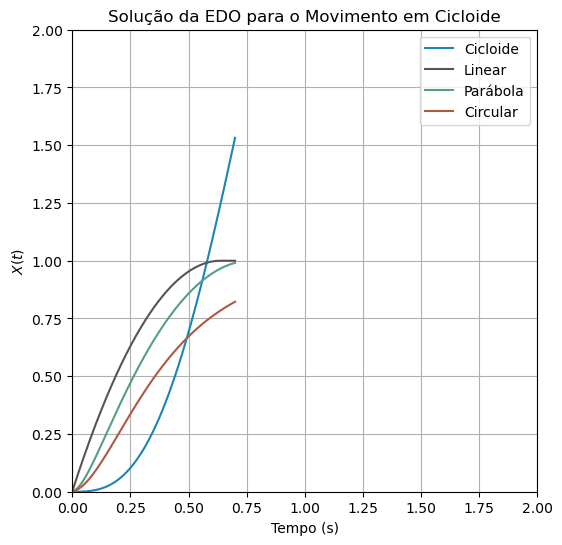

In [124]:
# Plotar a solução da EDO (theta em função do tempo)
plt.figure(figsize=(6, 6))
plt.plot(solucao_cycloid.t, x_cycloid, label=r"Cicloide", color='#1b85b8')
plt.plot(solucao_linear.t, x_linear, label='Linear', color='#5a5255')
plt.plot(solucao_parabola.t, x_parabola, label='Parábola', color='#559e83')
plt.plot(solucao_circle.t, x_circle ,label='Circular', color='#ae5a41')
plt.xlabel('Tempo (s)')
#plt.hlines(10, 0,100, '-l')
plt.xlim(0,2 )
plt.ylabel(r'$X(t)$')
plt.title('Solução da EDO para o Movimento em Cicloide')
plt.ylim(0, b + 1)
plt.grid(True)
plt.legend()
plt.show()

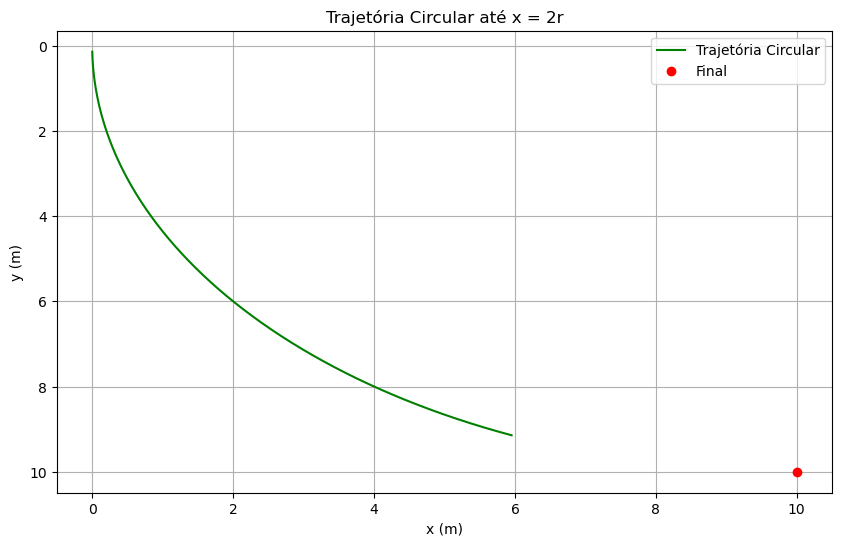

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definindo constantes físicas
m, g = 1, 9.81
a, b = 10, 10

# Calcular o raio r
r = (b**2 + a**2) / (2 * a)

# Função que representa a EDO para a trajetória circular
def derivada_circle(t, x):
    y_x = np.sqrt(2 * r * x[0] - x[0]**2)
    dy_x = (r - x[0]) / np.sqrt(2 * r * x[0] - x[0]**2)
    return np.array([np.sqrt(2 * g * y_x) / np.sqrt(1 + dy_x**2)])

# Função de evento para parar a integração quando x atinge 2r
def evento_x_limite(t, x):
    return 2 * r - x[0]

# Configuração para que o evento pare a integração quando x = 2r
evento_x_limite.terminal = True
evento_x_limite.direction = -1

# Condição inicial para a solução da EDO da trajetória circular
x0 = 0.001  # x(0) = 0.001 para evitar divisão por zero

# Intervalo de tempo para a solução e pontos de avaliação
t_span = (0, 1.4)  # Intervalo de tempo de 0 a 10 segundos
t_eval = np.linspace(*t_span, num=1000)  # 1000 pontos no intervalo

# Resolver a EDO para o círculo usando o método 'BDF' e a função de evento
solucao_circle = solve_ivp(
    derivada_circle, 
    t_span, 
    [x0], 
    t_eval=t_eval, 
    method='BDF', 
    events=evento_x_limite
)

# Extrair os valores de x e calcular y para a trajetória circular
x_circle = solucao_circle.y[0]
# Aplicar um filtro para garantir que o argumento dentro da raiz seja não-negativo
y_circle = np.sqrt(np.maximum(2 * r * x_circle - x_circle**2, 0))

# Gráfico das soluções
plt.figure(figsize=(10, 6))
plt.plot(x_circle, y_circle, label='Trajetória Circular', color='g')

# Adicionar o ponto final com as coordenadas (2r, 0)
plt.plot(a, b, 'ro', label='Final')
#plt.text(2 * r, 0, f'(2r, 0)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Configurações adicionais do gráfico
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajetória Circular até x = 2r')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para coordenadas físicas
plt.show()

